In [12]:
#This was done using the help of this tutorial:https://youtu.be/w8yWXqWQYmU

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape images to 1D arrays
train_images = train_images.reshape((train_images.shape[0], 28*28))
test_images = test_images.reshape((test_images.shape[0], 28*28))

# Combine images and labels into Pandas DataFrames
train_df = pd.DataFrame(np.column_stack([train_images, train_labels]), columns=["pixel_"+str(i) for i in range(28*28)] + ["label"])
test_df = pd.DataFrame(np.column_stack([test_images, test_labels]), columns=["pixel_"+str(i) for i in range(28*28)] + ["label"])


In [16]:
data = np.array(train_df)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[-1]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[-1]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [17]:
Y_train

array([2, 0, 7, ..., 1, 2, 9], dtype=uint8)

In [18]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [19]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [20]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 7 7 ... 6 7 7] [2 0 7 ... 1 2 9]
0.12396610169491526
Iteration:  10
[8 0 7 ... 6 8 2] [2 0 7 ... 1 2 9]
0.24010169491525424
Iteration:  20
[8 0 7 ... 6 8 2] [2 0 7 ... 1 2 9]
0.3486949152542373
Iteration:  30
[8 0 7 ... 1 2 2] [2 0 7 ... 1 2 9]
0.42945762711864405
Iteration:  40
[2 0 7 ... 1 2 2] [2 0 7 ... 1 2 9]
0.4944915254237288
Iteration:  50
[2 0 7 ... 1 2 2] [2 0 7 ... 1 2 9]
0.5433050847457627
Iteration:  60
[2 0 7 ... 1 2 2] [2 0 7 ... 1 2 9]
0.5798983050847457
Iteration:  70
[2 0 7 ... 1 2 9] [2 0 7 ... 1 2 9]
0.6111694915254238
Iteration:  80
[2 0 7 ... 1 2 9] [2 0 7 ... 1 2 9]
0.638542372881356
Iteration:  90
[2 0 7 ... 1 2 9] [2 0 7 ... 1 2 9]
0.6610338983050847
Iteration:  100
[2 0 7 ... 1 2 9] [2 0 7 ... 1 2 9]
0.6814576271186441
Iteration:  110
[2 0 7 ... 1 2 9] [2 0 7 ... 1 2 9]
0.699
Iteration:  120
[2 0 7 ... 1 2 9] [2 0 7 ... 1 2 9]
0.7143898305084746
Iteration:  130
[2 0 7 ... 1 2 9] [2 0 7 ... 1 2 9]
0.7267966101694915
Iteration:  140
[2 0 7 ... 1

In [21]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


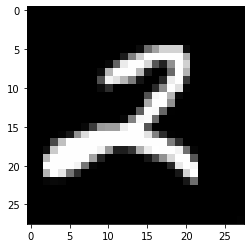

Prediction:  [0]
Label:  0


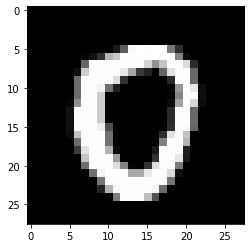

Prediction:  [7]
Label:  7


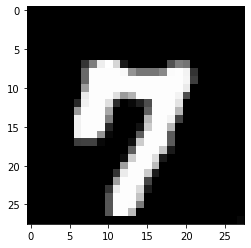

Prediction:  [2]
Label:  6


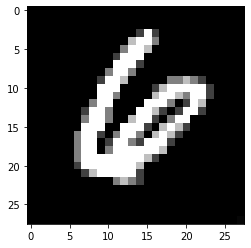

In [22]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [23]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 2 1 2 4 3 1 0 0 5 0 1 9 0 7 2 4 0 7 6 8 8 6 4 0 1 9 7 7 9 9 0 1 2 7 1 0
 3 0 6 8 6 5 7 7 4 8 9 7 0 8 8 6 5 3 7 0 5 6 0 6 1 9 5 8 7 1 6 0 5 1 1 8 5
 7 1 3 7 9 9 0 7 3 4 6 6 8 5 9 6 9 0 8 0 2 7 3 8 6 7 2 4 0 5 6 1 7 6 8 9 8
 8 1 3 3 8 0 3 9 5 2 4 3 1 6 1 3 9 8 2 7 6 9 1 7 7 0 1 0 0 2 5 4 9 6 8 4 1
 4 2 0 2 7 9 3 0 3 1 0 5 6 4 3 1 1 1 2 7 8 5 0 2 8 8 3 5 1 2 2 0 3 5 7 5 6
 2 1 6 6 3 1 6 4 9 7 2 4 0 5 4 1 3 9 7 6 2 7 9 6 2 7 6 1 1 0 7 3 4 7 1 8 9
 2 3 8 4 7 9 2 0 0 8 3 0 5 9 1 7 6 8 8 0 0 6 1 2 3 1 6 8 3 1 0 4 6 6 3 9 0
 5 4 1 0 7 6 8 0 5 4 0 1 9 3 6 3 2 5 7 3 0 6 0 4 9 9 7 9 3 8 7 6 2 6 1 4 0
 2 8 9 7 9 5 0 7 2 0 5 9 9 3 7 2 2 0 8 3 4 6 5 9 7 9 3 9 5 8 9 4 1 7 8 4 1
 6 6 0 5 3 4 3 7 8 9 6 9 4 4 8 5 8 0 2 8 9 2 0 5 1 6 8 8 0 3 6 8 2 2 1 3 3
 8 2 1 2 3 3 9 8 4 4 9 6 6 6 3 7 5 0 0 4 9 1 3 8 7 0 2 6 6 2 7 5 5 6 7 4 4
 7 7 5 8 8 0 9 2 4 9 9 0 7 3 7 8 1 8 0 1 6 1 9 8 1 5 8 3 1 9 7 3 7 1 6 3 1
 0 4 2 0 9 6 0 6 9 0 1 8 1 6 1 0 0 2 9 0 9 9 7 4 4 8 7 4 1 1 3 1 8 0 9 9 8
 7 1 0 0 0 9 4 9 1 8 0 5 

0.839